In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import	f1_score

### Получите и загрузите данные.

https://drive.google.com/file/d/1reu1l8hdctQnWsvCvAlUVLCfz31ZXnAo/view?usp=share_link

In [ ]:
! gdown 1reu1l8hdctQnWsvCvAlUVLCfz31ZXnAo

Downloading...
From: https://drive.google.com/uc?id=1reu1l8hdctQnWsvCvAlUVLCfz31ZXnAo
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 50.1MB/s]


In [ ]:
df = pd.read_csv('/content/train.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [ ]:
X1 = df[:].copy()

del X1['Name']
del X1['PassengerId']
del X1['Sex']
del X1['Ticket']
del X1['Cabin']
del X1['Embarked']

X1 = X1[~(X1['Age'].isna())]

y1 = X1['Survived']
del X1['Survived']

In [ ]:
X1.head(3)

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250


In [ ]:
y1.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [ ]:
len(X1), len(y1)

(714, 714)

In [ ]:
X1.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
model.fit(X1_train, y1_train)
predictions = model.predict(X1_test)
proba = model.predict_proba(X1_test)

In [ ]:
f1_score(y1_test, predictions)

0.5771812080536913

In [ ]:
model.score(X1_train, y1_train), model.score(X1_test, y1_test)

(0.6973947895791583, 0.7069767441860465)

### Снова загрузите полные данные.

In [ ]:
df = pd.read_csv('/content/train.csv')
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
X2 = df[['Survived', 'Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']].copy()

Удалил призники PassengerId, Name, Ticket, Cabin, т.к. они не являются ценными для предсказания выживаемости пассажира.

In [ ]:
X2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
X2['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
X2.isna().mean().sort_values(ascending=False) # процент пропусков

Age         0.198653
Embarked    0.002245
Survived    0.000000
Pclass      0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
dtype: float64

При удалении всех пропусков будет потеряно ~ 20% данных

In [ ]:
X2.describe() # среднее значение Age ~ 30

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
X2[['Embarked']].value_counts(dropna=False) # мода Embarked = 'S'

Embarked
S           644
C           168
Q            77
NaN           2
dtype: int64

In [ ]:
X2['Age'] = X2['Age'].fillna(30) # заполняем пропуски средним
X2['Embarked'] = X2['Embarked'].fillna('S') # заполняем пропуски модой

In [ ]:
X2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
X2.isna().mean().sort_values(ascending=False) # процент пропусков после заполнения пропусков

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

Категориальные переменные переведите в цифровые значения

In [ ]:
X2 = pd.get_dummies(X2, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
X2.tail(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
888,0,3,30.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


Проверьте данные на наличие выбросов

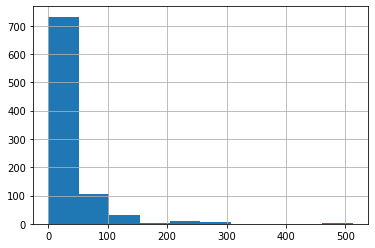

In [ ]:
X2['Fare'].hist() # начальная гистограмма (выбросы в районе 500)

In [ ]:
q98 = X2['Fare'].quantile(0.98) # значение "Fare", ниже которого находится 98% данных

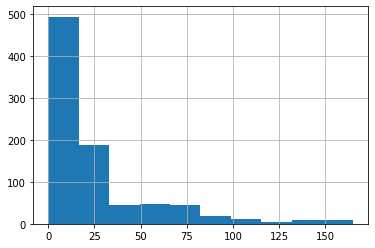

In [ ]:
X2[X2['Fare'] < q98]['Fare'].hist() # гистограмма без выбросов

In [ ]:
def change_to_moda(x): # заменяем выбросы "Fare" на среднее значение переменной (32.2)
  if x >= q98:
    return 32.2
  else:
    return x

X2['Fare'] = df['Fare'].apply(change_to_moda)

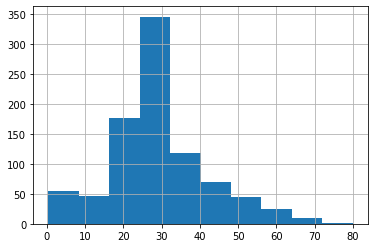

In [ ]:
X2['Age'].hist()

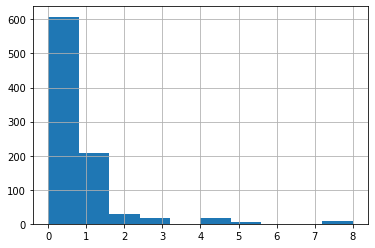

In [ ]:
X2['SibSp'].hist()

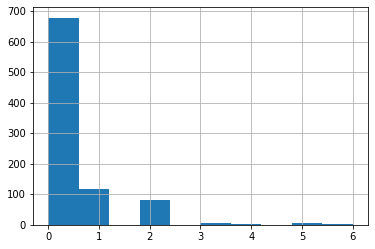

In [ ]:
X2['Parch'].hist()

In [ ]:
y2 = X2[['Survived']]
del X2['Survived']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

model.fit(X2_train, y2_train)
predictions = model.predict(X2_test)
proba = model.predict_proba(X2_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
f1_score(y2_test, predictions)

0.7663551401869159

In [ ]:
model.score(X2_train, y2_train), model.score(X2_test, y2_test)

(0.7993579454253612, 0.8134328358208955)

Выводы:

1) В начале была создана Модель_1. Были удалены все пропуски и категориальные переменные. 

Рассчитаная F-мера = 0.57, точность предсказаний ~ 70 %

2) Далее была создана Модель_2:
*   Были удалены признаки PassengerId, Name, Ticket, Cabin.
*   Пропуски "Embarked" были заполнены значением моды "S".

*   Пропуски "Age" были заполнены средним значением 30.
*   Категориальный переменные "Sex", "Embarked" были преобразованы one-hot кодированием.
*   В переменной "Fare" выбросы были заменены на среднее значение.

Рассчитаная F-мера = 0.76, точность предсказаний ~ 81 %

Таки образом, рост метрики модели подтвержадет необходимость работы с данными при построении моделей машинного обучения. 

